# Capstone Project - The Smart Fast Food Investor 

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Imagine that ,You are  an investor who want invest into profitable businesses on all around the world.
You  have the capital and  want to invest in Turkey.There are many  options on the desk .

**Invest in a fast food restaurant in Istanbul ?**

If we ask this question without using our data science powers , it sounds  quite bare and meaningless.

**Turkey’s  fast food market size 2.4 billion dollars and it continues to grow**.The word of  “2.4 billion dollars market size“ I think that make things more clear.


 The financial health and stability of this sector is strong   and getting stronger. 
Increasingly , Turkey’s young population promises  a high  potential on fast food sector.


**Aim of this project is to find optimal location or locations to open franchise fast food restaurants.Especially , This report will be targeted to guide investors who wants to invest in  fast  food restaurant in Istanbul.** 

Istanbul is the 14th  most populated  metropolis of the world with its 15 million people, 38 borough and 968 neighborhood. Therefore, a little question  comes into my mind, 

**Which part of Istanbul we should invest  ?**

My aim is  to detect neighborhoods that  have less rivals and have most potential customers.

Now , Lets’s dive into data ocean  to find optimal answers.


## Data <a name="data"></a>


**I will build my project  on 2 main factors,**

    1.I focused on percentage  of fast food restaurants on all food venues.
I categorized venues into 4 groups which can be alternative to fast food restaurants

a.	Fast Food 

b.	Restaurants 

c.	Cafe (includes cafe's and bars )

d.	Dessert shops

    2.	I focused on age – fast food consumption correlation, People between 15-35 age group are my target customers;

a.	According to a statistical hypotesis, age and fast food consumption have strong correlation.( provided by “Ekev Academic Magazine")

b.	In addition , According to a survey about fast food habits in Turkey , 45% of fast food consumers were aged 16-34 ( provided by “Mediabrands/Insight Research Company” )

**Data Description**
1.	Second-level Administrative Divisions of the Turkey json file  to create  coropleth map via  ratio of potential customers.(Provided by  Spatial Data Repository of NYU ) 
2.	Foursquare api to detect food venues in neighborhoods
3.	Turkish Statistical Institute ,  Medas platform –Demographic data of Istanbul boroughs to detect age and population distribution
4.	Geocoder Library  to detect coordinates of neighborhoods
5.	İstanbul Metropolitan Municipality open data portal to detect neighborhood populations


## Methodology <a name="methodology"></a>

**1.Data Cleaning and Pre-processing**



   **1.1.Libraries imported and foursquare api credentials was entered**

In [106]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
print('Libraries imported.')

Libraries imported.


In [2]:
CLIENT_ID = 'O3INK0QQMDEG1EXBSVQGTNRZIJHHWYI4OCOAJ5CCUMJTACIH'  # my Foursquare ID
CLIENT_SECRET = 'NQEPWFVUU3TWKQ4ZZFMEWJPM52DYE5MGYGFAJDRYNR1IHBXS'  # my Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 500 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: O3INK0QQMDEG1EXBSVQGTNRZIJHHWYI4OCOAJ5CCUMJTACIH
CLIENT_SECRET:NQEPWFVUU3TWKQ4ZZFMEWJPM52DYE5MGYGFAJDRYNR1IHBXS


**1.2 Useful  datas imported from github**

In [3]:
url_geojson ="https://raw.githubusercontent.com/farukpala/DATA-SCIENCE-FINAL-PROJECT/main/stanford-nj696zj1674-geojson.json"
url_demographic="https://raw.githubusercontent.com/farukpala/DATA-SCIENCE-FINAL-PROJECT/main/istanbul_demographic.csv"
url_borough_coor="https://raw.githubusercontent.com/farukpala/DATA-SCIENCE-FINAL-PROJECT/main/istanbul_borough_coordinates.csv"
url_neighborhood_pop="https://raw.githubusercontent.com/farukpala/DATA-SCIENCE-FINAL-PROJECT/main/neighborhood_pop.csv"

In [4]:
#Download geojson file for coropleth map 
!wget --quiet https://raw.githubusercontent.com/farukpala/DATA-SCIENCE-FINAL-PROJECT/main/stanford-nj696zj1674-geojson.json
    
#https://geo.nyu.edu/download/file/stanford-nj696zj1674-geojson.json   
print('GeoJSON file downloaded!')

data = r'istanbul_geo.json'

GeoJSON file downloaded!


**1.3 Demographic data imported and grouped. Target customer group is people aged between 15-34**

    Does age play a role in fast food consumption? As We learned from survey 45 % of  Turkish people aged 15-34 eat fast food on any given day.I use this information for citing Turkey's fast food consumer profile.

In [5]:
#Here we can see demographics of Istanbul  by borough 
population=pd.read_csv(url_demographic)
population.head()

,borough,15-19_divorced,15-19_partner_died,15-19_married,15-19_never_married,20-24_divorced,20-24_partner_died,20-24_married,20-24_never_married,25-29_divorced,25-29_partner_died,25-29_married,25-29_never_married,30-34_divorced,30-34_partner_died,30-34_married,30-34_never_married,35-39_divorced,35-39_partner_died,35-39_married,35-39_never_married,40-44_divorced,40-44_partner_died,40-44_married,40-44_never_married,45-49_divorced,45-49_partner_died,45-49_married,45-49_never_married,50-54_divorced,50-54_partner_died,50-54_married,50-54_never_married,55-59_divorced,55-59_partner_died,55-59_married,55-59_never_married,60-64_divorced,60-64_partner_died,60-64_married,60-64_never_married,65-69_divorced,65-69_partner_died,65-69_married,65-69_never_married,70-74_divorced,70-74_partner_died,70-74_married,70-74_never_married,75-79_divorced,75-79_partner_died,75-79_married,75-79_never_married,80-84_divorced,80-84_partner_died,80-84_married,80-84_never_married,85-89_divorced,85-89_partner_died,85-89_married,85-89_never_married,90+_divorced,90+_partner_died,90+_married,90+_never_married
0,Adalar,NaN,NaN,4,844,2,NaN,55,1014,14,NaN,236,691,52,1,518,481,95,2,661,354,149,7,711,278,175,13,744,223,191,27,764,154,207,44,813,124,221,82,813,108,144,102,706,76,111,159,519,34,53,184,344,27,25,143,176,13,7,125,69,9,5,74,23,2.0
1,Arnavutkoy,1.0,NaN,476,23960,134,4.0,6660,17757,439,19.0,17414,8711,763,50,22207,3568,1045,107,22496,1753,1060,220,18955,988,881,348,15154,570,618,463,10255,322,502,850,9773,280,312,952,6147,162,212,1103,3936,81,122,1061,2154,51,55,868,974,34,27,645,437,18,18,431,155,5,5,191,22,8.0
2,Atasehir,NaN,1.0,191,27107,107,1.0,2811,27262,594,18.0,12815,19239,1575,52,22424,10156,2645,115,28594,6114,3439,251,29975,4017,3497,537,27496,2498,2905,727,21227,1346,2219,1247,19114,899,1529,1663,13526,531,918,2098,9624,331,586,2432,6203,222,300,2141,3054,144,149,1649,1307,85,84,1207,495,54,46,697,137,39.0
3,Avcilar,1.0,NaN,268,27890,131,4.0,4250,25522,612,21.0,14968,17023,1564,45,24912,8570,2457,133,29688,5295,3035,265,29458,3527,3043,521,24943,2124,2466,805,19103,1150,2059,1391,18120,727,1433,1821,12642,412,946,2246,8939,227,498,2311,5226,132,222,1945,2403,62,103,1479,1029,42,44,905,376,14,10,425,87,6.0
4,Bagcilar,3.0,NaN,437,59664,202,11.0,8725,52140,856,40.0,29690,29241,1780,86,45317,13394,2843,236,52926,7693,3247,451,52013,4636,2957,892,46925,2638,2020,1166,32626,1242,1549,1979,29051,786,912,2339,17209,360,492,2970,11149,253,277,2974,6326,140,119,2372,2894,59,66,1697,1116,41,26,998,346,22,11,514,104,15.0


In [96]:
# I revised sum up  all data to see my target customer profile 
sum_all=population.sum(1)
pop_15_34=population.loc[:,:"30-34_never_married"].sum(1)
pop_rest=population.loc[:,"35-39_divorced":].sum(1)
population_target=pd.concat([pop_15_34,pop_rest,sum_all],1)
population_target.columns=["sum 15-34","sum 35-90","sum_all"]
population_target["borough"]=population.borough
population_target["ratio 15-34"]=population_target["sum 15-34"]/population_target["sum_all"]
population_target.head()

,sum 15-34,sum 35-90,sum_all,borough,ratio 15-34
0,3912.0,10090.0,14002.0,Adalar,0.279389
1,102163.0,106826.0,208989.0,Arnavutkoy,0.488844
2,124353.0,210113.0,334466.0,Atasehir,0.371796
3,125781.0,196295.0,322076.0,Avcilar,0.390532
4,241586.0,303677.0,545263.0,Bagcilar,0.443063


**1.4 Coordinates of boroughs  imported**

 I will use this coordinates on Geocoder library .Thus I will find coordinates of neighborhoods

In [7]:
#Borough names and coordinates of Istanbul 
# I found borough centers using googlemap's "search nearby" feature
coor=pd.read_csv(url_borough_coor)
coor.head()

,Borough,Latitude,Longitude
0,Adalar,40.8619,29.1208
1,Arnavutkoy,41.1956,28.7352
2,Atasehir,40.9831,29.1279
3,Avcilar,40.9880,28.7170
4,Bagcilar,41.0450,28.8338


**1.5 I created an empty map object of Istanbul using folium** 

In [190]:
#I create map object of Istanbul with coordinates
lat=41.008429654560615
lon=28.97836148221529 
map_istanbul=folium.Map(location=[lat,lon],zoom_start=10)
map_istanbul


**1.6 Neighborhood names and  populations imported**

I will  use neighborhood and borough names to find neighborhood coordinates.Therefore, I zipped neighborhood names and
boroughs to avoid confusion of neighborhoods with same name. 
Example: There are 2 neighborhood have same name in two different boroughs.
I zipped as "15 temmuz , Esenler" ," 15 Temmuz,Bagcilar"

In [110]:
#Neighborhood names and population 
nb_pop=pd.read_csv(url_neighborhood_pop)
# I zipped neighborhood names and boroughs to avoid confusion of neighborhoods with same name 
#Ex: There are 2 neighborhood have name  "15 temmuz " .I zipped as "15 temmuz , Esenler" ," 15 Temmuz,Bagcilar" 
nb_pop["neighborhood"]=nb_pop["neighborhood"]+","+nb_pop["borough"]
nb_pop.head()

,borough,neighborhood,neighborhood_pop
0,Adalar,"Burgazada,Adalar",1418
1,Adalar,"Heybeliada,Adalar",3837
2,Adalar,"Kinaliada,Adalar",1731
3,Adalar,"Maden,Adalar",3916
4,Adalar,"Nizam,Adalar",3048


**1.7 I got neighborhood coordinates using Geocoder Library**

I used geocoder library to find neighborhood coordinates, Geocoder library is not responding for every query 
 
I continue to send request until it responds (So I use "while" loop)

In [12]:
import geocoder
# Defining a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Istanbul, Turkey'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Call the function to get the coordinates, store in a new list using list comprehension
nb_coords = [ get_latlng(neighborhood) for neighborhood in nb_pop["neighborhood"].tolist()]


In [120]:
#I split latitude and longitude values
lt=[]
ln=[]
for i in range(len(nb_coords)):
    lat=nb_coords[i][0]
    lt.append(lat)
    lon=nb_coords[i][1]
    ln.append(lon)

nb_pop["lat"]=lt
nb_pop["lon"]=ln
nb_pop.head()  # Geocoder query returned coordinates of 963 neighborhoods at 38 borough 

,borough,neighborhood,neighborhood_pop,lat,lon
0,Adalar,"Burgazada,Adalar",1418,40.88113,29.07024
1,Adalar,"Heybeliada,Adalar",3837,40.87682,29.10167
2,Adalar,"Kinaliada,Adalar",1731,40.90941,29.05241
3,Adalar,"Maden,Adalar",3916,40.87500,29.12984
4,Adalar,"Nizam,Adalar",3048,40.87501,29.12913


In [112]:
nb_pop.shape

(963, 3)

**1.8 I got venues from foursquare api for 963 neighborhoods**

Now we are ready to get venues using foursquare api from 963 neighborhoods

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()
        results=results["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Foursquare api lets 800 request per day , So I deleted some neighborhoods from 963 to 798 and saved as "neighborhood_coordinates.csv"
Query takes more than 30 minutes 

In [17]:
url_venues="https://raw.githubusercontent.com/farukpala/DATA-SCIENCE-FINAL-PROJECT/main/neighborhood_coordinates.csv"
nb_coor=pd.read_csv(url_venues)
nb_coor.head()
#venues=istanbul_venues = getNearbyVenues(names=nb_pop['neighborhood'],latitudes=nb_pop['lat'], longitudes=nb_pop['lon']                               

,borough,neighborhood,neighborhood_pop,lat,lon
0,Adalar,"Burgazada,Adalar",1418,40.88113,29.07024
1,Adalar,"Heybeliada,Adalar",3837,40.87682,29.10167
2,Adalar,"Kinaliada,Adalar",1731,40.90941,29.05241
3,Adalar,"Maden,Adalar",3916,40.87500,29.12984
4,Adalar,"Nizam,Adalar",3048,40.87501,29.12913


I got error when I try to  import whole dataset to foursquare api,Therefore I split "neighborhood coordinates"  dataset into two parts.
So that, I got venues succesfully, After I got results , I concatenated to one part .

In [18]:
nb_coor1=nb_coor.loc[:400,:]
nb_coor2=nb_coor.loc[401:,:]
venues_1=getNearbyVenues(names=nb_coor1["neighborhood"],latitudes=nb_coor1["lat"],longitudes=nb_coor1["lon"])
venues_2=getNearbyVenues(names=nb_coor2["neighborhood"],latitudes=nb_coor2["lat"],longitudes=nb_coor2["lon"])

Burgazada,Adalar
Heybeliada,Adalar
Kinaliada,Adalar
Maden,Adalar
Nizam,Adalar
Fatih,Arnavutkoy
Hicret,Arnavutkoy
Tayakadin,Arnavutkoy
Adnan Menderes,Arnavutkoy
Maresal Fevzi cakmak,Arnavutkoy
Mehmet Akif Ersoy,Arnavutkoy
Deliklikaya,Arnavutkoy
omerli,Arnavutkoy
Tasoluk,Arnavutkoy
Bolluca,Arnavutkoy
Ataturk,Arnavutkoy
Mavigol,Arnavutkoy
Nenehatun,Arnavutkoy
Haracci,Arnavutkoy
Karlibayir,Arnavutkoy
Bogazkoy İstiklal,Arnavutkoy
İmrahor,Arnavutkoy
Hastane,Arnavutkoy
Yavuz Selim,Arnavutkoy
Mustafa Kemal Pasa,Arnavutkoy
Yunus Emre,Arnavutkoy
Arnavutkoy Merkez,Arnavutkoy
İslambey,Arnavutkoy
Hadimkoy,Arnavutkoy
Anadolu,Arnavutkoy
Asikveysel,Atasehir
Ataturk,Atasehir
Barbaros,Atasehir
Esatpasa,Atasehir
Ferhatpasa,Atasehir
Fetih,Atasehir
İcerenkoy,Atasehir
İnonu,Atasehir
Kayisdagi,Atasehir
Kucukbakkalkoy,Atasehir
Mevlana,Atasehir
Mimar Sinan,Atasehir
Mustafa Kemal,Atasehir
ornek,Atasehir
Yeni camlica,Atasehir
Yenisahra,Atasehir
Yenisehir,Atasehir
Ambarli,Avcilar
Cihangir,Avcilar
Denizkoskler,Avc

Karayollari,Gaziosmanpasa
Karlitepe,Gaziosmanpasa
Kazim Karabekir,Gaziosmanpasa
Merkez,Gaziosmanpasa
Mevlana,Gaziosmanpasa
Pazarici,Gaziosmanpasa
Sarigol,Gaziosmanpasa
semsipasa,Gaziosmanpasa
Yenidogan,Gaziosmanpasa
Yeni Mahalle,Gaziosmanpasa
Yildiztabya,Gaziosmanpasa
Abdurrahman Nafiz Gurman,Gungoren
Akincilar,Gungoren
Gencosman,Gungoren
Gunestepe,Gungoren
Guven,Gungoren
Haznedar,Gungoren
Maresal cakmak,Gungoren
Mehmet Nesih ozmen,Gungoren
Merkez,Gungoren
Sanayi,Gungoren
Tozkoparan,Gungoren
19 mayis,Kadikoy
Acibadem,Kadikoy
Bostanci,Kadikoy
Caddebostan,Kadikoy
Caferaga,Kadikoy
Dumlupinar,Kadikoy
Egitim,Kadikoy
Erenkoy,Kadikoy
Fenerbahce,Kadikoy
Feneryolu,Kadikoy
Fikirtepe,Kadikoy
Goztepe,Kadikoy
Hasanpasa,Kadikoy
Kosuyolu,Kadikoy
Kozyatagi,Kadikoy
Merdivenkoy,Kadikoy
Osmanaga,Kadikoy
Rasimpasa,Kadikoy
Sahrayicedit,Kadikoy
Suadiye,Kadikoy
Zuhtupasa,Kadikoy
caglayan,Kagithane
celiktepe,Kagithane
Emniyet Evleri,Kagithane
Gultepe,Kagithane
Gursel,Kagithane
Hamidiye,Kagithane
Harmantepe,Ka

In [19]:
venues=pd.concat([venues_1,venues_2],axis=0)  # I concatenated 2 parts into one 
# I changed columns names for easier queries
venues.columns=["neighborhood","nb_lat","nb_lon","venue","venue_lat","venue_lon","venue_cat"] 
venues.head()

,neighborhood,nb_lat,nb_lon,venue,venue_lat,venue_lon,venue_cat
0,"Burgazada,Adalar",40.88113,29.07024,Burgazada Sahil,40.881171,29.069600,Beach
1,"Burgazada,Adalar",40.88113,29.07024,Sait Faik Abasıyanık Müzesi,40.881015,29.067458,History Museum
2,"Burgazada,Adalar",40.88113,29.07024,Sinem Dondurma,40.880984,29.069779,Ice Cream Shop
3,"Burgazada,Adalar",40.88113,29.07024,Burgazada Deniz Kulübü,40.879190,29.070356,Other Great Outdoors
4,"Burgazada,Adalar",40.88113,29.07024,Adalar Su Sporları Kulübü,40.879114,29.072084,Beach


**1.9 Food venues categorized**

I categorized venues into 4 groups so that I can easily analyse neighborhoods.4 main  venue groups are ;

    1.Fast Food
    
    2.Restaurants
    
    3.Cafe (includes cafe's and bars )
    
    4.Dessert shops
    

In [20]:
# I categorized venues manually because I couldnt find a method to categorize turkish local food categories
url_venue_categories="https://raw.githubusercontent.com/farukpala/DATA-SCIENCE-FINAL-PROJECT/main/venue_categories.csv"
ven_cat=pd.read_csv(url_venue_categories)

fast_food=ven_cat.sub_cat[ven_cat.cat=="fast food"].to_list() 
restaurant=ven_cat.sub_cat[ven_cat.cat=="restaurant"].to_list()
cafe=ven_cat.sub_cat[ven_cat.cat=="cafe"].to_list()
dessert_shop=ven_cat.sub_cat[ven_cat.cat=="dessert shop"].to_list()



In [21]:
ven_cat.head()

,sub_cat,cat
0,Breakfast Spot,fast food
1,Pizza Place,fast food
2,Snack Place,fast food
3,Burger Joint,fast food
4,Soup Place,fast food


In [22]:
def cat_grp(row):    #I define a function to group venue categories, and applied to all venues
    if row in fast_food:
        return "fast_food"
    elif row in restaurant:
        return "restaurant"
    elif row in cafe:
        return "cafe"
    elif row in dessert_shop:
        return "dessert shop"

venues["venue_cat"]=venues.venue_cat.apply(cat_grp)
venues.head()

,neighborhood,nb_lat,nb_lon,venue,venue_lat,venue_lon,venue_cat
0,"Burgazada,Adalar",40.88113,29.07024,Burgazada Sahil,40.881171,29.069600,None
1,"Burgazada,Adalar",40.88113,29.07024,Sait Faik Abasıyanık Müzesi,40.881015,29.067458,None
2,"Burgazada,Adalar",40.88113,29.07024,Sinem Dondurma,40.880984,29.069779,dessert shop
3,"Burgazada,Adalar",40.88113,29.07024,Burgazada Deniz Kulübü,40.879190,29.070356,None
4,"Burgazada,Adalar",40.88113,29.07024,Adalar Su Sporları Kulübü,40.879114,29.072084,None


In [23]:
# I selected only food venues , museums,beaches etc eliminated
venues=venues.loc[venues.venue_cat.isnull()==False] 

In [24]:
venues.reset_index(drop=True,inplace=True) # after selection , I ordered index 
venues.head()

,neighborhood,nb_lat,nb_lon,venue,venue_lat,venue_lon,venue_cat
0,"Burgazada,Adalar",40.88113,29.07024,Sinem Dondurma,40.880984,29.069779,dessert shop
1,"Burgazada,Adalar",40.88113,29.07024,Adalar Cemevi Çay Bahçesi,40.879195,29.068156,cafe
2,"Burgazada,Adalar",40.88113,29.07024,Four Letter Word,40.880573,29.068838,cafe
3,"Burgazada,Adalar",40.88113,29.07024,İndos Bar,40.879317,29.069743,cafe
4,"Burgazada,Adalar",40.88113,29.07024,İskele Çardak 1947,40.880486,29.069798,restaurant


## Analysis <a name="analysis"></a>

**1.Exploratory Data Analysis**

**1.1 Age Distribution by Borough**

   Let's take a first look at demographics of Istanbul. At first glance , Esenyurt borough attracted my attention. 
   Crowdest borough of Istanbul in additon Esenyurt has the most potential customer ratio.

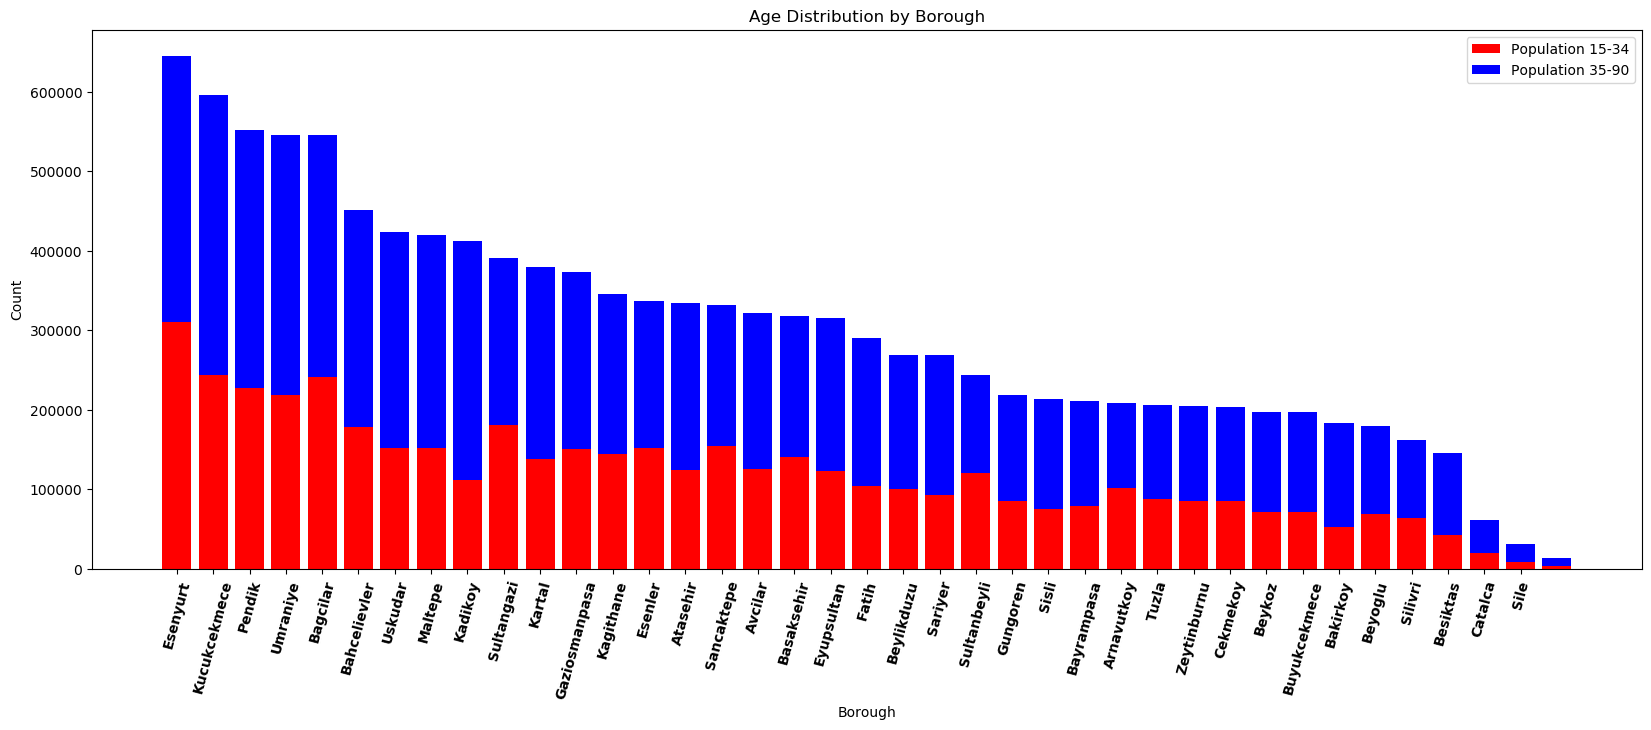

In [139]:
#I sorted total  populations by borough to see better visualization
pop_sorted=population_target.sort_values(by="sum_all",ascending=False)
f, ax = plt.subplots(figsize=(20,7))
labels=pop_sorted.borough.tolist()
r=range(38)
bar1=pop_sorted["sum 15-34"].values
bar2=pop_sorted["sum 35-90"].values
plt.bar(labels,bar1,color="r")
plt.bar(labels,bar2,bottom=bar1,color="b")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.legend(["Population 15-34","Population 35-90"])
plt.title("Age Distribution by Borough")
plt.xticks(r, labels, fontweight='bold',rotation=75) 
plt.show()

**1.2 Let's look at borough centers and how its distributed** 

In [140]:
#I create map object of Istanbul with coordinates
lat=41.008429654560615
lon=28.97836148221529 
map_istanbul2=folium.Map(location=[lat,lon],zoom_start=10)
map_istanbul2

for lat,lng,br in zip(coor["Latitude"],coor["Longitude"],coor["Borough"]):
    label=br
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],radius=5,popup=label,color="red",fill=True,fill_color='#3186cc',fill_opacity=0.7,parse_html=False).add_to(map_istanbul2)

map_istanbul2

**1.3 Neighborhoods on the  map** 

    By now , All we see is chaos , but We will discover hidden order in chaos 

In [141]:
#Now We can see borough centers
#I create map object of Istanbul with coordinates
lat=41.008429654560615
lon=28.97836148221529 
map_istanbul3=folium.Map(location=[lat,lon],zoom_start=10)

for lat,lng,br in zip(nb_pop["lat"],nb_pop["lon"],nb_pop["neighborhood"]):
    label=br
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],radius=5,popup=label,color="red",fill=True,fill_color='#3186cc',fill_opacity=0.7,parse_html=False).add_to(map_istanbul3)

map_istanbul3

**2.Clustering**

My aim is to analyse neighborhoods by percentage  of fast food restaurants on all food venues,so I grouped venues by neighborhood and I took mean of frequency.

In [142]:
# one hot encoding
venues_onehot=pd.get_dummies(venues["venue_cat"]) 
# add neighborhood column back to dataframe
venues_onehot["neighborhood"]=venues["neighborhood"]
# proportion of venue types 
venues_onehot=venues_onehot.groupby("neighborhood").mean()
# I reordered index 
venues_onehot.reset_index(inplace=True)
venues_onehot.head()

,neighborhood,cafe,dessert shop,fast_food,restaurant
0,"100. Yil,Bagcilar",0.366667,0.033333,0.333333,0.266667
1,"15 temmuz,Bagcilar",0.343750,0.062500,0.187500,0.406250
2,"15 temmuz,Esenler",0.343750,0.062500,0.187500,0.406250
3,"19 mayis,Buyukcekmece",0.409091,0.000000,0.181818,0.409091
4,"19 mayis,Kadikoy",0.404255,0.063830,0.212766,0.319149


In [143]:
#  I used  fast food ratio values for clustering
k_clusters=4  
k_means=KMeans(n_clusters=k_clusters,random_state=42).fit(venues_onehot[["fast_food"]])
labels=k_means.labels_
venues_onehot["labels"]=labels
venues_onehot.head()

,neighborhood,cafe,dessert shop,fast_food,restaurant,labels
0,"100. Yil,Bagcilar",0.366667,0.033333,0.333333,0.266667,2
1,"15 temmuz,Bagcilar",0.343750,0.062500,0.187500,0.406250,1
2,"15 temmuz,Esenler",0.343750,0.062500,0.187500,0.406250,1
3,"19 mayis,Buyukcekmece",0.409091,0.000000,0.181818,0.409091,1
4,"19 mayis,Kadikoy",0.404255,0.063830,0.212766,0.319149,1


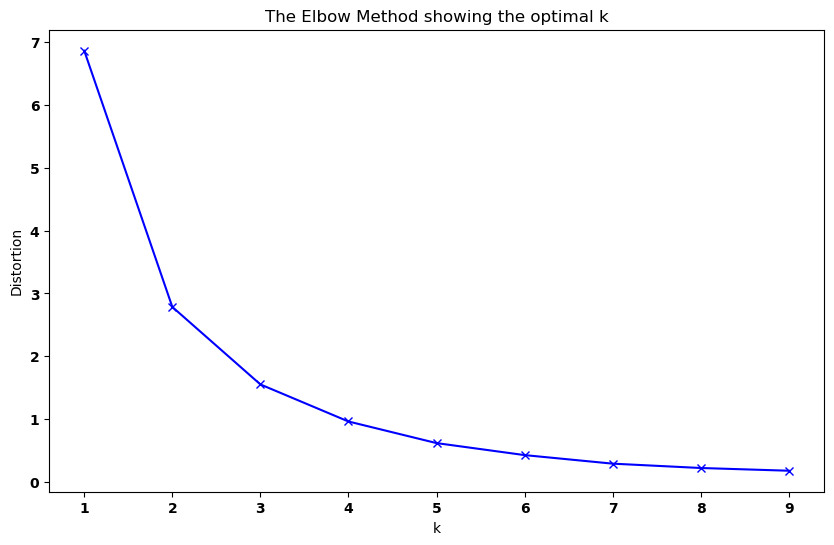

In [160]:
# According to elbow method, optimal key value looks like 3 or 4, where distortion value goes horizontal.I use 4
fast=venues_onehot[["fast_food"]]
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(fast)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [144]:
venues_onehot=pd.merge(venues_onehot,nb_coor,on="neighborhood")
venues_onehot=venues_onehot[["borough","neighborhood","neighborhood_pop","lat","lon","fast_food","cafe","restaurant","dessert shop","labels"]]
venues_onehot.head()

,borough,neighborhood,neighborhood_pop,lat,lon,fast_food,cafe,restaurant,dessert shop,labels
0,Bagcilar,"100. Yil,Bagcilar",32532,41.06378,28.84995,0.333333,0.366667,0.266667,0.033333,2
1,Bagcilar,"15 temmuz,Bagcilar",34960,41.03799,28.81169,0.187500,0.343750,0.406250,0.062500,1
2,Esenler,"15 temmuz,Esenler",2758,41.03799,28.81169,0.187500,0.343750,0.406250,0.062500,1
3,Buyukcekmece,"19 mayis,Buyukcekmece",6596,41.02508,28.58687,0.181818,0.409091,0.409091,0.000000,1
4,Kadikoy,"19 mayis,Kadikoy",27317,40.97618,29.08916,0.212766,0.404255,0.319149,0.063830,1


 Let's check the labels, as we see , the most intense fast food venues labeled as 2
 
 **The more intense fast food ratio values means the more rivals we have. We should focus on less rivals and high potential customers.**

In [159]:
# Sorted dataframe by fast food ratio
venues_onehot.sort_values(by="fast_food",ascending=False).head(50)

,borough,neighborhood,neighborhood_pop,lat,lon,fast_food,cafe,restaurant,dessert shop,labels,label_name
519,Sancaktepe,"Pasakoy,Sancaktepe",1236,41.00908,29.28492,0.666667,0.000000,0.333333,0.000000,2,Investment Priority 4
464,Sultanbeyli,"Mimar Sinan,Sultanbeyli",14565,40.99424,29.26869,0.600000,0.000000,0.000000,0.400000,2,Investment Priority 4
333,Catalca,"Kaleici,catalca",5760,41.15027,28.45312,0.500000,0.000000,0.500000,0.000000,2,Investment Priority 4
722,Pendik,"camlik,Pendik",12349,40.92634,29.27361,0.500000,0.500000,0.000000,0.000000,2,Investment Priority 4
489,Arnavutkoy,"Nenehatun,Arnavutkoy",5946,41.19623,28.73364,0.500000,0.000000,0.500000,0.000000,2,Investment Priority 4
534,Pendik,"Ramazanoglu,Pendik",2019,40.89910,29.28614,0.500000,0.166667,0.166667,0.166667,2,Investment Priority 4
95,Beykoz,"Baklaci,Beykoz",2332,41.06379,29.13754,0.500000,0.375000,0.125000,0.000000,2,Investment Priority 4
618,Umraniye,"Topagaci,umraniye",10262,41.05125,29.10330,0.500000,0.500000,0.000000,0.000000,2,Investment Priority 4
784,Arnavutkoy,"İslambey,Arnavutkoy",14774,41.19334,28.74938,0.444444,0.222222,0.333333,0.000000,2,Investment Priority 4
456,Sancaktepe,"Mevlana,Sancaktepe",12734,41.01189,29.25901,0.437500,0.375000,0.187500,0.000000,2,Investment Priority 4


**cluster 2 : Investment Priority 4 color:turquoise**

**cluster 1 : Investment Priority 3 color:purple**

**cluster 3 : Investment Priority 2 color:yellow**

**cluster 0 : Investment Priority 1 color:red**

In [179]:
#I define a function to group venue categories, and applied to all venues
def cluster_name(row):    
    if row == 2:
        return "Investment Priority 4"
    elif row == 1:
        return "Investment Priority 3"
    elif row == 3:
        return "Investment Priority 2"
    elif row == 0 :
        return "Investment Priority 1"

venues_onehot["label_name"]=venues_onehot.labels.apply(cluster_name)
venues_onehot.head()

,borough,neighborhood,neighborhood_pop,lat,lon,fast_food,cafe,restaurant,dessert shop,labels,label_name
0,Bagcilar,"100. Yil,Bagcilar",32532,41.06378,28.84995,0.333333,0.366667,0.266667,0.033333,2,Investment Priority 4
1,Bagcilar,"15 temmuz,Bagcilar",34960,41.03799,28.81169,0.187500,0.343750,0.406250,0.062500,1,Investment Priority 3
2,Esenler,"15 temmuz,Esenler",2758,41.03799,28.81169,0.187500,0.343750,0.406250,0.062500,1,Investment Priority 3
3,Buyukcekmece,"19 mayis,Buyukcekmece",6596,41.02508,28.58687,0.181818,0.409091,0.409091,0.000000,1,Investment Priority 3
4,Kadikoy,"19 mayis,Kadikoy",27317,40.97618,29.08916,0.212766,0.404255,0.319149,0.063830,1,Investment Priority 3


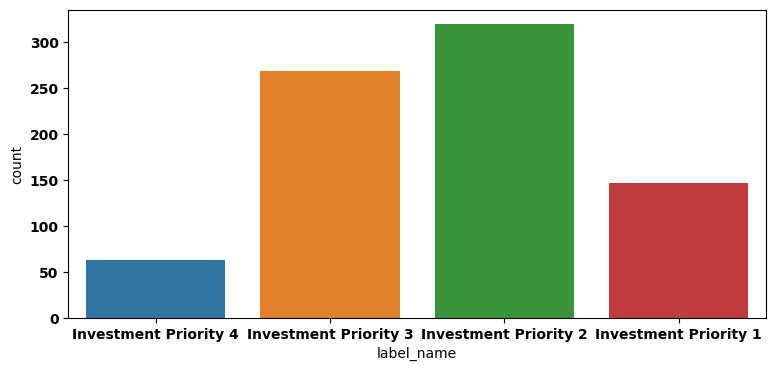

In [275]:
#Cluster count 
import seaborn as sns
plt.figure(figsize=(9,4))
data3=venues_onehot
sns.countplot(x="label_name",data=data3)
plt.show()

## Results and Discussion <a name="results"></a>

**1.Results**

**1.1Visualization**

    Here comes the answer for our vital question that we asked in "Introduction: Business Problem section "

 **Which part of Istanbul we should invest ?**

In [191]:
# Coropleth map shows potential customers ratio

map_istanbul.choropleth(
    geo_data=data,
    data=population_target,
    columns=['borough','ratio 15-34'],
    key_on='feature.properties.name_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='15-34 Age Population Ratio',
    highlight=True
)

# set color scheme for the clusters   
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,label_name,pop in zip(venues_onehot['lat'], venues_onehot['lon'], venues_onehot['neighborhood'], venues_onehot['labels'],venues_onehot["label_name"],venues_onehot["neighborhood_pop"]):
    label = folium.Popup(str(poi)  +","+ label_name + ",Potential Customers:"+ str(pop)  , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_istanbul)


map_istanbul  

**1.2 Venue categories by Borough** 

In [181]:
# I derived dataframe for stacked bar plot which contains  sum of  venue categories and total venue count. 
data_plt=pd.get_dummies(venues["venue_cat"])
data_plt["neighborhood"]=venues["neighborhood"]
data_plt=pd.merge(data_plt,nb_coor,on="neighborhood")
data_plt=data_plt.groupby("borough").sum()
data_plt.reset_index(inplace=True)
sum_venues=data_plt.loc[:,:"restaurant"].sum(1)
data_plt["sum_venues"]=sum_venues
data_plt=data_plt.sort_values(by="sum_venues",ascending=False)
data_plt.head()


,borough,cafe,dessert shop,fast_food,restaurant,neighborhood_pop,lat,lon,sum_venues
19,Fatih,963.0,229.0,283.0,1320.0,18060664,114633.53450,80924.15670,2795.0
12,Beyoglu,881.0,140.0,184.0,741.0,6625282,79854.56722,56381.82849,1946.0
17,Esenyurt,555.0,75.0,193.0,470.0,19418529,53051.98454,37069.17379,1293.0
36,Uskudar,592.0,100.0,141.0,430.0,15776242,51817.62112,36683.37640,1263.0
35,Umraniye,417.0,123.0,210.0,499.0,18355576,51229.98368,36381.35704,1249.0


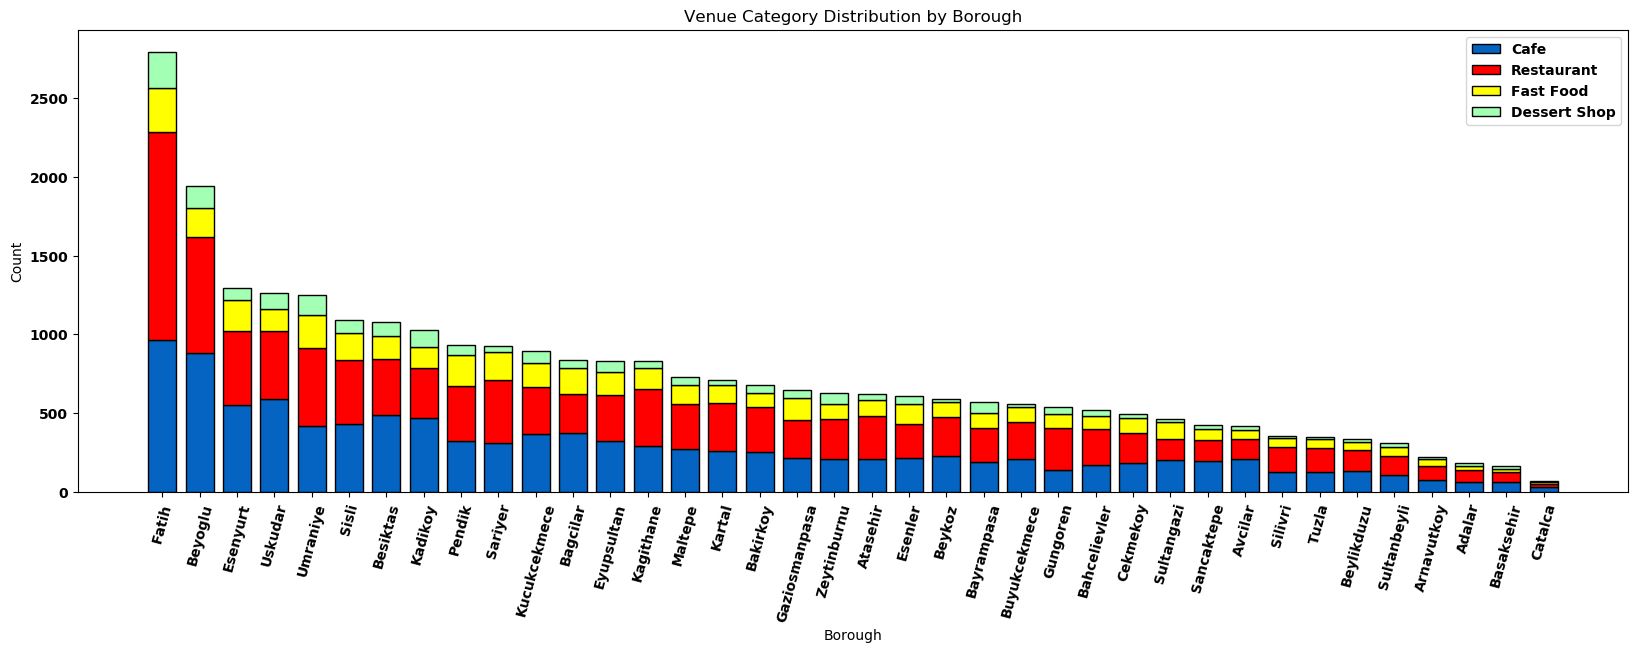

In [182]:
#I used stacked bar plot so that I can see total venue count(bar length) by borough also, 
#I can see percentage of venue categories 
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

f, ax = plt.subplots(figsize=(20,6))
# y-axis in bold
rc('font', weight='bold')
# Values of each group
cafe=data_plt.cafe.values
dessert_shop=data_plt["dessert shop"].values
fast_food=data_plt.fast_food.values
restaurant=data_plt.restaurant.values
 
# The position of the bars on the x-axis
r = range(38)
 # Names of group and bar width
names = data_plt.borough.tolist()
barWidth = 0.75
 # cafe
plt.bar(r, cafe, color='#0563c1', edgecolor='black', width=barWidth)
# Restaurant, on top of the first ones
plt.bar(r, restaurant, bottom=cafe, color='#ff0000', edgecolor='black', width=barWidth)
# Fast food
plt.bar(r, fast_food, bottom=restaurant+cafe, color='#ffff00', edgecolor='black', width=barWidth)
#Dessert shop (top)
plt.bar(r, dessert_shop, bottom=restaurant+fast_food+cafe, color='#a3ffb4', edgecolor='black', width=barWidth) 
# Custom X axis
plt.xticks(r, names, fontweight='bold',rotation=75)
plt.xlabel("Borough")
plt.ylabel("Count")
plt.legend(["Cafe","Restaurant","Fast Food","Dessert Shop"])
plt.title("Venue Category Distribution by Borough")
# Show graphic
plt.show()


As wee see in graph,Fatih first  ,  Beyoglu second  crowded places by  venue count. 
These  boroughs are very attractive places for tourists. Esenyurt is more residential area also the most populated borough.


This smart investor wants to pay less and  to take more . At first glance , we'll focus on red points on  maroon area. 
That shows "Investment Priority 1" also  potential customer ratio high.We will clarify right place to invest at 2 steps.

**1.First we will clarify boroughs ;**

The boroughs have maroon color are : Arnavutkoy , Esenyurt, Sultangazi ,Sancaktepe and Sultanbeyli.

Esenyurt is the most populated borough also has the biggest  potential customer ratio , So my first investment choice  is Esenyurt  , and the second one is Basaksehir 
Let's take a close look to Esenyurt , 
At Esenyurt , population  between the age of 15 and 90 is 645782  and there are 1293 food venues. Esenyurt has only % 14.9 percentage fast food venues although it has 1293 food venues.

**2. Second we will clarify neighborhoods;**

**Selahaddin Eyyubi  , Hurriyet , Sultaniye , Talatpasa  neighborhoods** of Esenyurt  are in  "Investment Priority 1" cluster . Also their populations are 17515,17657,14553, 18615 . İstanbul's average population by neighborhood is 11963.Comperatively , These neighborhoods has overpopulated by far . 

Another shining star is Basaksehir;

Eventhough Basaksehir borough's  potential customer ratio lower than Esenyurt ,  Guvercintepe,Basak and Basaksehir neighborhoods  are  good options for investment.**Guvercintepe,Basak and Basaksehir neighborhood** populations are 43507, 49899 and 44928  .In other words, nearly 3 times bigger than Istanbul's average.These 3 neighborhoods has %43.7 percentage of Basaksehir. Half of Basaksehir's population packed in these 3 neighborhoods  
In additon , as we see on the map , food venue concentration around these neighborhoods are  low .**That's attractive.**


<function matplotlib.pyplot.show(*args, **kw)>

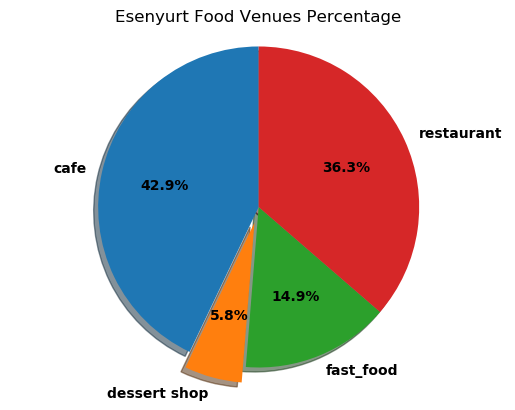

In [228]:
# Esenyurt  Food Venues Percentage 
labels="cafe","dessert shop","fast_food","restaurant"
data=[555,75,193,470]
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Esenyurt Food Venues Percentage")
plt.show

In [231]:
nb_pop.neighborhood_pop.mean()

11963.484942886813

<function matplotlib.pyplot.show(*args, **kw)>

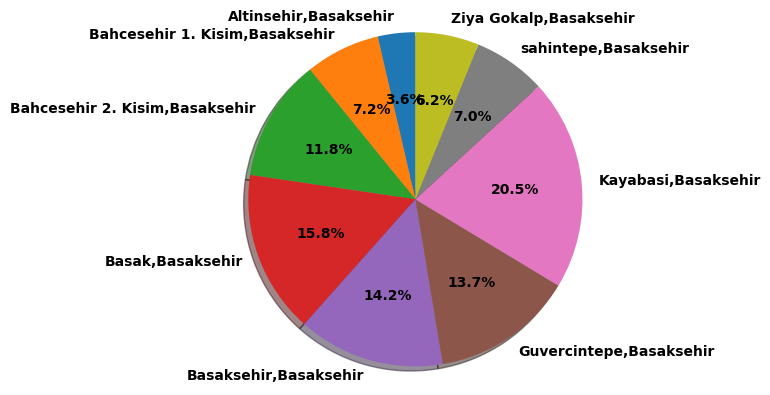

In [258]:
# Başakşehir population percentage by neighborhoods 
basaksehir=nb_pop[(nb_pop.neighborhood_pop > 10000) & (nb_pop.borough=="Basaksehir")] 
labels2=basaksehir.neighborhood.values
data2=basaksehir.neighborhood_pop.values
fig1, ax1 = plt.subplots()
ax1.pie(data2, labels=labels2,  shadow=True,autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.show

## Conclusion <a name="conclusion"></a>

At this covid 19 era  , We are witnessing capstone  moments of  mankind history . Our daily routines are changing at a tremendous speed. Pandemic  boosted digitalization.
As a  natural result of this  revolutionary  changes, our customer habits are changing.Online food delivery has  became more important for both business owners and customers as more people tend to order takeout during pandemic. **Superstar of online food delivery is fast food sector .** 

Turkish people  are  exceptionally young people. The median age around 30. In additon,  working hours are long. Turkey’s average working hours is 9 hours  and significantly higher than European countries.Working young  Turkish people has less time to cook at home .This is fueling fast food sector and makes it profitable business model . That s why  I decided to examine fast food business.

Data driven decisions are more precise than heuristic decisions . This project  was my first end to end  data science project . I experienced every step of a data science project   from defining business problem to having  managerial insights . I also  learn to use different data sources and web scraping techniques . Especially the most important earning of this project to me is to having vision  what can I do with data. It was  exciting experience . 
